In [6]:
import numpy as np

In [7]:
from django.db import connection

In [8]:
from gtdb2.models import Org
from gtdb2.models import Seq
from gtdb2.models import Fshift
from pprint import pprint

from chelatase_db.models import ChelataseFeat
from chelatase_db.models import ChelataseSeq
from chelatase_db.models import ChelataseOrg
#from chelatase_db.models import ChelataseCof

# Org

In [9]:
c_org = Org.objects.all()#get(id=86).all()
# #['chel_genotype_genes']
#c_org.pr
print(c_org.query)
#print(connection.queries)  
#c_org.values_list('genus')

SELECT `orgs`.`id`, `orgs`.`user_id`, `orgs`.`c_date`, `orgs`.`descr`, `orgs`.`name`, `orgs`.`genus`, `orgs`.`phylum`, `orgs`.`kingdom` FROM `orgs`


In [10]:
c_org = Org.objects.filter(id=86).all()
print(c_org)
for i in c_org: print(i)

<QuerySet [<Org: Delftia acidovorans SPH-1>]>
Delftia acidovorans SPH-1


# Seq

In [6]:
c_org = Org.objects.get(id=86)
s_org = Seq.objects.get(org=c_org)

print(s_org)
seq_id = s_org.id
seq_id

NC_010002


'NC_010002.1'

In [7]:
delf = Org.objects.all() #get(id=86)
delf.values_list()

<QuerySet [(84, 12, datetime.datetime(2019, 5, 3, 20, 36, 30, tzinfo=<UTC>), None, 'Methanocaldococcus sp. FS406-22', 'Methanocaldococcus', 'Euryarchaeota', 'Archaea'), (85, 12, datetime.datetime(2019, 5, 3, 20, 36, 33, tzinfo=<UTC>), None, 'Methanocaldococcus fervens AG86', 'Methanocaldococcus', 'Euryarchaeota', 'Archaea'), (86, 12, datetime.datetime(2019, 5, 3, 20, 36, 41, tzinfo=<UTC>), None, 'Delftia acidovorans SPH-1', 'Delftia', 'Proteobacteria', 'Bacteria'), (87, 12, datetime.datetime(2019, 5, 3, 20, 38, 11, tzinfo=<UTC>), None, 'Bacillus pseudofirmus OF4', 'Bacillus', 'Firmicutes', 'Bacteria'), (88, 12, datetime.datetime(2019, 5, 3, 20, 38, 19, tzinfo=<UTC>), None, 'Escherichia coli str. K-12 substr. MG1655', 'Escherichia', 'Proteobacteria', 'Bacteria'), (89, 12, datetime.datetime(2019, 5, 3, 20, 38, 30, tzinfo=<UTC>), None, 'Methanococcus voltae A3', 'Methanococcus', 'Euryarchaeota', 'Archaea'), (90, 12, datetime.datetime(2019, 5, 3, 20, 39, 7, tzinfo=<UTC>), None, 'Corynebact

In [8]:
sub_Org = Org.objects.filter(param_set__name='chel_num_chld', param_set__num__gt=0).all()
    
print(sub_Org.query)

SELECT `orgs`.`id`, `orgs`.`user_id`, `orgs`.`c_date`, `orgs`.`descr`, `orgs`.`name`, `orgs`.`genus`, `orgs`.`phylum`, `orgs`.`kingdom` FROM `orgs` INNER JOIN `org_params` ON (`orgs`.`id` = `org_params`.`parent_id`) WHERE (`org_params`.`name` = chel_num_chld AND `org_params`.`num` > 0.0)


In [9]:
c_org = ChelataseOrg.objects.get(id=86)
#['chel_genotype_genes']
print(c_org)
c_org.prm


Delftia acidovorans SPH-1


AttrDict({'dir_name': 'Delftia_acidovorans_SPH_1', 'source_fn': '/home/ivan/_my/github/django_gtdb2/chelatase_db/data/D_acidovorans.gbk', 'short_name': 'D. acidovorans', 'num_seqs': 1, 'taxonomy': ['Bacteria', 'Proteobacteria', 'Betaproteobacteria', 'Burkholderiales', 'Comamonadaceae', 'Delftia'], 'xref': [{'db_name': 'BioProject', 'ext_id': 'PRJNA224116'}, {'db_name': 'BioSample', 'ext_id': 'SAMN00623041'}, {'db_name': 'Assembly', 'ext_id': 'GCF_000018665.1'}, {'db_name': 'taxon', 'ext_id': '398578'}], 'transl_table': [11], 'seq_rrna_16s': 'AGATCGAACTGTAGAGTTTGATCCTGGCTCAGATTGAACGCTGGCGGCATGCCTTACACATGCAAGTCGAACGGTAACAGGTCTTCGGACGCTGACGAGTGGCGAACGGGTGAGTAATACATCGGAACGTGCCCAGTCGTGGGGGATAACTACTCGAAAGAGTAGCTAATACCGCATACGATCTGAGGATGAAAGCGGGGGACCTTCGGGCCTCGCGCGATTGGAGCGGCCGATGGCAGATTAGGTAGTTGGTGGGATAAAAGCTTACCAAGCCGACGATCTGTAGCTGGTCTGAGAGGACGACCAGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATTTTGGACAATGGGCGAAAGCCTGATCCAGCAATGCCGCGTGCAGGATGAAGGCCTTCGGGTTGTAAACTGCTTTTGTACGGAACGAAAAA

In [10]:
# feat_set=ChelataseOrg.objects.filter(id=86).all() #
# feat_set

# chel_genes = ChelataseFeat.objects.filter(seq__org=c_org).all()
# chel_genes.values_list()

# Feat/Fshift

In [11]:
# c_org = Org.objects.get(id=86)  # Берем Delftia acidovorans 
# print(c_org)
# s_org = Seq.objects.get(org=c_org)  #Берем последовательность для Delftia 
# #print(s_org)
# seq_id = s_org.id
# chel_sub = ChelataseFshift.objects.filter(feat__param_set__name="chel_subunit", seq_id=sq_id).all()

# #print(chel_sub.query)
# #print(chel_sub)


# for i in chel_sub:
#     print(i)
#     print(i.start)
#     print(i.end)
# #NC_010002.1:6395007-6396839(-)

In [12]:
# c_org = Org.objects.get(param_set__name='chel_genotype_genes', id=86)  # Берем Delftia acidovorans 
# print(c_org,'\n')
# f_org = ChelataseFeat.objects.filter(seq__org=c_org).all()
# print(f_org)


ch_set = ChelataseFeat.objects.filter(seq__org=86, param_set__name='chel_subunit').all()
all_parents = [i.parent_id for i in ch_set if i.parent_id is not None]
ch_set_draw = [i for i in ch_set if i.id not in all_parents]
f_org = ch_set_draw

f_org[1].strand

-1

In [13]:
#print(f_org.query)
#f_org.values_list('descr')

dict_plot = {'max':10} 


for i in f_org:
    if 'chelatase' in i.descr:
        if max(i.end, i.start) > dict_plot['max']:
            dict_plot['max'] = max(i.end, i.start)
            
dict_plot['max']/=50

for i in f_org:
    #if 'chelatase' in i.descr:
        
    print(i, 'Start:', i.start, 'End:', i.end)
    print(i.descr)
    print()
    dict_plot[i.name] = [{'len':   i.end-i.start/dict_plot['max'],
                          'start': i.start/dict_plot['max'],
                          'end':   i.end/dict_plot['max'],
                          'loc' : ((i.start+i.end)/2)/dict_plot['max'],
                          'label': i.prm.chel_gene,
                          'strand': i.strand
                         }]

            
seq = c_org.seq_set.first()
fsh_set = Fshift.objects.filter(seq__org=c_org).all()

for i in fsh_set:
    dict_plot[i.name] = [{'len': (i.end-i.start)/dict_plot['max'],
                        'start': i.start/dict_plot['max'],
                        'end':   i.end/dict_plot['max'],
                        'loc':   ((i.start+i.end)/2)/dict_plot['max']
                             }]
dict_plot

DACI_RS29040_fs_DACI_RS29035 Start: 6395007 End: 6396839
magnesium chelatase | VWA domain-containing protein

DACI_RS29045 Start: 6396835 End: 6400657
cobaltochelatase subunit CobN

DACI_RS09960 Start: 2178725 End: 2179703
aerobic cobaltochelatase subunit CobS

DACI_RS09965 Start: 2179692 End: 2181384
cobaltochelatase



{'max': 128013.14,
 'DACI_RS29040_fs_DACI_RS29035': [{'len': 6396789.044136094,
   'start': 49.955863905845916,
   'end': 49.97017493672915,
   'loc': 49.963019421287534,
   'label': 'chlD',
   'strand': -1}],
 'DACI_RS29045': [{'len': 6400607.02985631,
   'start': 49.97014368993683,
   'end': 50.0,
   'loc': 49.98507184496842,
   'label': 'cobN',
   'strand': -1}],
 'DACI_RS09960': [{'len': 2179685.9804581,
   'start': 17.01954190015181,
   'end': 17.027181740874415,
   'loc': 17.023361820513113,
   'label': 'cobS',
   'strand': 1}],
 'DACI_RS09965': [{'len': 2181366.9729041876,
   'start': 17.02709581219553,
   'end': 17.040313205347513,
   'loc': 17.03370450877152,
   'label': 'cobT',
   'strand': 1}],
 'NC_010002.1:6395696:-1': [{'len': 0.014311030883235893,
   'start': 49.955863905845916,
   'end': 49.97017493672915,
   'loc': 49.963019421287534}]}

In [12]:
from dna_features_viewer import GraphicFeature, GraphicRecord

features=[
    GraphicFeature(start=dict_plot['DACI_RS09960'][0]['loc'],
                   end=dict_plot['DACI_RS09960'][0]['loc'],
                   strand=dict_plot['DACI_RS09960'][0]['strand'], color= "#ccccff", label="DACI_RS09960"), #Табличка
    GraphicFeature(start=dict_plot['DACI_RS09960'][0]['start']-2,
                   end=dict_plot['DACI_RS09960'][0]['end']+2,
                   strand=dict_plot['DACI_RS09960'][0]['strand'], color= "#ccccff",thickness=17, label=dict_plot['DACI_RS09960'][0]['label']),    
    

    GraphicFeature(start=dict_plot['DACI_RS09965'][0]['loc']-5,
                   end=dict_plot['DACI_RS09965'][0]['loc']-5,
                   strand=dict_plot['DACI_RS09965'][0]['strand'], color= "#ccccff", label="DACI_RS09965"), #Табличка
    GraphicFeature(start=dict_plot['DACI_RS09965'][0]['start']-7,
                   end=dict_plot['DACI_RS09965'][0]['end']-3,
                   strand=dict_plot['DACI_RS09965'][0]['strand'],
                   color= "#ccccff", label=dict_plot['DACI_RS09965'][0]['label']),    
    

#     GraphicFeature(start=325, end=328, strand=0, color="#ffd700"),
#     GraphicFeature(start=330, end=330, strand=0, color="#ffd700", label="about 4M \n nucleotides"),
#     GraphicFeature(start=332, end=335, strand=0, color="#ffd700"),


    GraphicFeature(start=dict_plot['DACI_RS29040_fs_DACI_RS29035'][0]['loc']-1,
                   end=dict_plot['DACI_RS29040_fs_DACI_RS29035'][0]['loc']-1,
                   strand=dict_plot['DACI_RS29040_fs_DACI_RS29035'][0]['strand'],
                   color="#cffccc", label="DACI_RS29040\n DACI_RS29035"), #Табличка
    
    #Две судьединицы + fsh
    GraphicFeature(start=dict_plot['DACI_RS29040_fs_DACI_RS29035'][0]['start']-5, thickness=14, 
                   end=dict_plot['DACI_RS29040_fs_DACI_RS29035'][0]['loc']-1,
                   strand=dict_plot['DACI_RS09960'][0]['strand'],
                   color="#cffccc", label=dict_plot['DACI_RS29040_fs_DACI_RS29035'][0]['label']),
    GraphicFeature(start=dict_plot['DACI_RS29040_fs_DACI_RS29035'][0]['loc'],
                   end=dict_plot['DACI_RS29040_fs_DACI_RS29035'][0]['loc']+1/5,
                   strand=dict_plot['DACI_RS29040_fs_DACI_RS29035'][0]['strand'], color="#ffcccc"),  
    GraphicFeature(start=dict_plot['DACI_RS29040_fs_DACI_RS29035'][0]['loc'], thickness=14,
                   end=dict_plot['DACI_RS29040_fs_DACI_RS29035'][0]['end'],
                   strand=dict_plot['DACI_RS29040_fs_DACI_RS29035'][0]['strand'], color="#cffccc"),    
    
    
    
    GraphicFeature(start=dict_plot['DACI_RS29045'][0]['loc']+1,
                   end=dict_plot['DACI_RS29045'][0]['loc']+1,
                   strand=dict_plot['DACI_RS29045'][0]['strand'],
                   color="#cffccc" , label="DACI_RS29045"),    #Табличка
    GraphicFeature(start=dict_plot['DACI_RS29045'][0]['start']-1,
                   end=dict_plot['DACI_RS29045'][0]['end']+3,
                   strand=dict_plot['DACI_RS29045'][0]['strand'],
                   color="#cffccc", label=dict_plot['DACI_RS29045'][0]['label']),  #ffcccc  #Правый ген
    
]
record = GraphicRecord(first_index=0.0, sequence_length=55.0, features = features, feature_level_height = 2,)

#record.plot_with_bokeh(figure_width=15, figure_height=3)
#record.plot()
record.plot(figure_width=15, figure_height=3);
 

KeyError: 'DACI_RS09960'

In [7]:
id_org = 84



c_org = Org.objects.get(param_set__name='chel_genotype_genes', id=id_org)  # Берем Delftia acidovorans 
#print(c_org,'\n')
f_org = ChelataseFeat.objects.filter(seq__org=c_org).all()
#print(f_org)


ch_set = ChelataseFeat.objects.filter(seq__org=id_org, param_set__name='chel_subunit').all()
all_parents = [i.parent_id for i in ch_set if i.parent_id is not None]
ch_set_draw = [i for i in ch_set if i.id not in all_parents]
f_org = ch_set_draw
 

dict_plot = {'max':10} 
locs = [0]

for i in f_org:
    if 'chelatase' in i.descr:
        if max(i.end, i.start) > dict_plot['max']:
            dict_plot['max'] = max(i.end, i.start)
            
scale = 50
dict_plot['max']/= scale

for i in f_org:
    #if 'chelatase' in i.descr:
    #print(i.type)
    #print(i, 'Start:', i.start, 'End:', i.end)
    #print(i.descr)
    #print()
    loc = ((i.start+i.end)/2)/dict_plot['max']
    locs.append(loc)
    dict_plot[i.name] = [{'len':   i.end-i.start/dict_plot['max'],
                          'start': i.start/dict_plot['max'],
                          'end':   i.end/dict_plot['max'],
                          'loc' : loc,
                          'label': i.prm.chel_gene,
                          'strand': i.strand,
                          'type': "gene"
                         }]

            
seq = c_org.seq_set.first()
fsh_set = Fshift.objects.filter(seq__org=c_org).all()

for i in fsh_set:
    loc = ((i.start+i.end)/2)/dict_plot['max']
    dict_plot[i.name] = [{'len': (i.end-i.start)/dict_plot['max'],
                        'start': i.start/dict_plot['max'],
                        'end':   i.end/dict_plot['max'],
                        'loc':   loc,
                          'type': "fsh"
                             }]



locs  = sorted(locs)




In [8]:
new_locs = {0:0}
tabs = []
a, b = 0, 0
for i in locs:
    b = i
    if b-a > 0.3*scale:
        #tabs.append( (b-a)/2 )
        new_locs[b]=max(new_locs.values())+15  #Сдвигаем 
        b = max(new_locs.values())+15
        a = b
        #a = max(new_locs.values())+10
        tabs.append( (b-a)/2 )
        a = b
         
        
    if b-a < 0.07*scale and b!=0:
        new_locs[b]=b-5
        a = b-5
    else:
        new_locs[b]=b
        a = b
        
new_locs , tabs

({0: 0,
  23.792622820416163: 15,
  30: 25,
  47.970966050647775: 40,
  55: 50,
  48.091068966895484: 43.091068966895484,
  49.93034814563449: 49.93034814563449},
 [0.0, 0.0])

max 25519.78
MFS40622_RS06240_fs_MFS40622_RS06245 [{'len': 1225180.0689833532, 'start': 47.931016646695234, 'end': 48.010915454600315, 'loc': 47.970966050647775, 'label': 'chlD', 'strand': 1, 'type': 'gene'}]
MFS40622_RS06250 [{'len': 1229068.9811691167, 'start': 48.01883088333834, 'end': 48.16330705045263, 'loc': 48.091068966895484, 'label': 'cobN', 'strand': -1, 'type': 'gene'}]
MFS40622_RS06440 [{'len': 1275939.1393037087, 'start': 49.86069629126897, 'end': 50.0, 'loc': 49.93034814563449, 'label': 'chlH', 'strand': 1, 'type': 'gene'}]
MFS40622_RS03055 [{'len': 608945.2773817015, 'start': 23.72261829843361, 'end': 23.86262734239872, 'loc': 23.792622820416163, 'label': 'cobN', 'strand': -1, 'type': 'gene'}]
NC_013887.1:1224254:-1 [{'len': 0.07989880790508383, 'start': 47.931016646695234, 'end': 48.010915454600315, 'loc': 47.970966050647775, 'type': 'fsh'}]


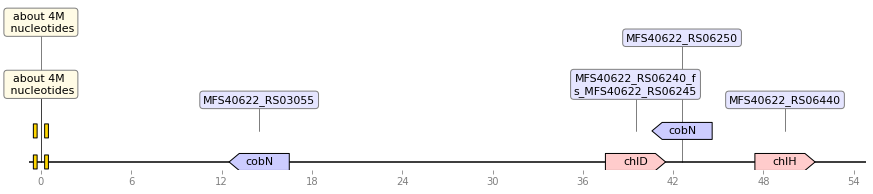

In [10]:



features = []
def get_color(gene):
    if 'chl' in gene: return '#ffcccc'
    else: return "#ccccff"
for k, v in dict_plot.items():
    print(k,v)
    if k !='max' and dict_plot[k][0]['type']=='gene':
        features.append(
            GraphicFeature(start=new_locs[dict_plot[k][0]['loc']],
                       end=new_locs[dict_plot[k][0]['loc']],
                       strand=dict_plot[k][0]['strand'],
                       color= "#ccccff", label=k)) #Табличка
        features.append(GraphicFeature(start=new_locs[dict_plot[k][0]['loc']]-2,
                       end=new_locs[dict_plot[k][0]['loc']]+2,
                       strand=dict_plot[k][0]['strand'],
                       color= get_color(dict_plot[k][0]['label']),
                       thickness=17,
                       label=dict_plot[k][0]['label']))
        

for lo in tabs:  
    features.append(
    GraphicFeature(start=lo, end=lo+1/4, strand=0, color="#ffd700"))
    features.append(
    GraphicFeature(start=lo+2/4, end=lo+2/4, strand=0, color="#ffd700", label="about 4M \n nucleotides"))
    features.append(
    GraphicFeature(start=lo+3/4, end=lo+4/4, strand=0, color="#ffd700")
    )
        
        
        
record = GraphicRecord(first_index=0.0, sequence_length=55.0, features = features, feature_level_height = 2,)

#record.plot_with_bokeh(figure_width=15, figure_height=3)
#record.plot()
record.plot(figure_width=15, figure_height=3);
 

# Ready to use

In [19]:
from io import StringIO

'<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Created with matplotlib (https://matplotlib.org/) -->\n<svg height="194.158125pt" version="1.1" viewBox="0 0 872.80285 194.158125" width="872.80285pt" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n <metadata>\n  <rdf:RDF xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n   <cc:Work>\n    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>\n    <dc:date>2021-04-26T07:24:36.897401</dc:date>\n    <dc:format>image/svg+xml</dc:format>\n    <dc:creator>\n     <cc:Agent>\n      <dc:title>Matplotlib v3.3.4, https://matplotlib.org/</dc:title>\n     </cc:Agent>\n    </dc:creator>\n   </cc:Work>\n  </rdf:RDF>\n </metadata>\n <defs>\n  <style type="text/css">*{stroke-linecap:butt;stroke-linejoin:r

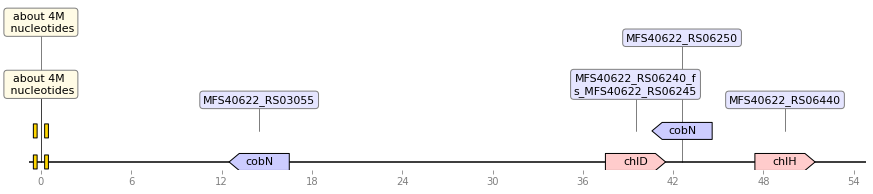

In [26]:
def plot_gen_diagram(self, id_org=84):
    id_org = 84
    c_org = Org.objects.get(param_set__name='chel_genotype_genes', id=id_org)  # Берем Delftia acidovorans 
    f_org = ChelataseFeat.objects.filter(seq__org=c_org).all()
    
    ch_set = ChelataseFeat.objects.filter(seq__org=id_org, param_set__name='chel_subunit').all()
    all_parents = [i.parent_id for i in ch_set if i.parent_id is not None]
    ch_set_draw = [i for i in ch_set if i.id not in all_parents]
    f_org = ch_set_draw

    dict_plot = {'max':10} 
    locs = [0]

    for i in f_org:
        if 'chelatase' in i.descr:
            if max(i.end, i.start) > dict_plot['max']:
                dict_plot['max'] = max(i.end, i.start)

    scale = 50
    dict_plot['max']/= scale

    for i in f_org:
        loc = ((i.start+i.end)/2)/dict_plot['max']
        locs.append(loc)
        dict_plot[i.name] = [{'len':   i.end-i.start/dict_plot['max'],
                              'start': i.start/dict_plot['max'],
                              'end':   i.end/dict_plot['max'],
                              'loc' : loc,
                              'label': i.prm.chel_gene,
                              'strand': i.strand,
                              'type': "gene"
                             }]


    seq = c_org.seq_set.first()
    fsh_set = Fshift.objects.filter(seq__org=c_org).all()

    for i in fsh_set:
        loc = ((i.start+i.end)/2)/dict_plot['max']
        dict_plot[i.name] = [{'len': (i.end-i.start)/dict_plot['max'],
                            'start': i.start/dict_plot['max'],
                            'end':   i.end/dict_plot['max'],
                            'loc':   loc,
                              'type': "fsh"
                                 }]

    locs  = sorted(locs)
    new_locs = {0:0}
    tabs = []
    a, b = 0, 0
    for i in locs:
        b = i
        if b-a > 0.3*scale:
            new_locs[b]=max(new_locs.values())+15  #Сдвигаем 
            b = max(new_locs.values())+15
            a = b
            tabs.append( (b-a)/2 )
            a = b


        if b-a < 0.07*scale and b!=0:
            new_locs[b]=b-5
            a = b-5
        else:
            new_locs[b]=b
            a = b

    features = []
    def get_color(gene):
        if 'chl' in gene: return '#ffcccc'
        else: return "#ccccff"
    for k, v in dict_plot.items():
        if k !='max' and dict_plot[k][0]['type']=='gene':
            features.append(
                GraphicFeature(start=new_locs[dict_plot[k][0]['loc']],
                           end=new_locs[dict_plot[k][0]['loc']],
                           strand=dict_plot[k][0]['strand'],
                           color= "#ccccff", label=k)) #Табличка
            features.append(GraphicFeature(start=new_locs[dict_plot[k][0]['loc']]-2,
                           end=new_locs[dict_plot[k][0]['loc']]+2,
                           strand=dict_plot[k][0]['strand'],
                           color= get_color(dict_plot[k][0]['label']),
                           thickness=17,
                           label=dict_plot[k][0]['label']))


    for lo in tabs:  
        features.append(
        GraphicFeature(start=lo, end=lo+1/4, strand=0, color="#ffd700"))
        features.append(
        GraphicFeature(start=lo+2/4, end=lo+2/4, strand=0, color="#ffd700", label="about 4M \n nucleotides"))
        features.append(
        GraphicFeature(start=lo+3/4, end=lo+4/4, strand=0, color="#ffd700")
        )

    record = GraphicRecord(first_index=0.0, sequence_length=55.0, features = features, feature_level_height = 2)
    
    ax, plo= record.plot(figure_width=15, figure_height=3);
    
    svg_pic = StringIO()
    
    ax.figure.savefig(svg_pic, format="svg", bbox_inches='tight')
    
    print(self.name)
    return svg_pic.getvalue()

self = 5
plot_gen_diagram(self, id_org=84)  

max 25519.78
MFS40622_RS06240_fs_MFS40622_RS06245 [{'len': 1225180.0689833532, 'start': 47.931016646695234, 'end': 48.010915454600315, 'loc': 47.970966050647775, 'label': 'chlD', 'strand': 1, 'type': 'gene'}]
MFS40622_RS06250 [{'len': 1229068.9811691167, 'start': 48.01883088333834, 'end': 48.16330705045263, 'loc': 48.091068966895484, 'label': 'cobN', 'strand': -1, 'type': 'gene'}]
MFS40622_RS06440 [{'len': 1275939.1393037087, 'start': 49.86069629126897, 'end': 50.0, 'loc': 49.93034814563449, 'label': 'chlH', 'strand': 1, 'type': 'gene'}]
MFS40622_RS03055 [{'len': 608945.2773817015, 'start': 23.72261829843361, 'end': 23.86262734239872, 'loc': 23.792622820416163, 'label': 'cobN', 'strand': -1, 'type': 'gene'}]
NC_010002.1:6395696:-1 [{'len': 0.07178745271315035, 'start': 250.59020884976283, 'end': 250.66199630247598, 'loc': 250.6261025761194, 'type': 'fsh'}]


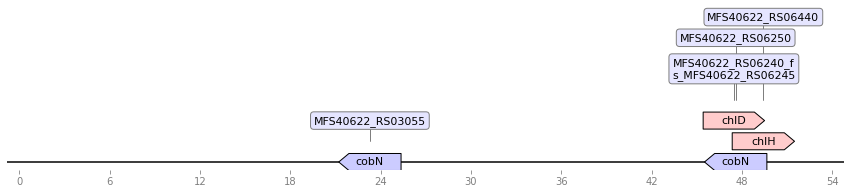

In [39]:
features = []
def get_color(gene):
    if 'chl' in gene: return '#ffcccc'
    else: return "#ccccff"
for k, v in dict_plot.items():
    print(k,v)
    if k !='max' and dict_plot[k][0]['type']=='gene':
        features.append(
            GraphicFeature(start=dict_plot[k][0]['loc'],
                       end=dict_plot[k][0]['loc'],
                       strand=dict_plot[k][0]['strand'],
                       color= "#ccccff", label=k)) #Табличка
        features.append(GraphicFeature(start=dict_plot[k][0]['start']-2,
                       end=dict_plot[k][0]['end']+2,
                       strand=dict_plot[k][0]['strand'],
                       color= get_color(dict_plot[k][0]['label']),
                       thickness=17,
                       label=dict_plot[k][0]['label']))
        

        
record = GraphicRecord(first_index=0.0, sequence_length=55.0, features = features, feature_level_height = 2,)

#record.plot_with_bokeh(figure_width=15, figure_height=3)
#record.plot()
record.plot(figure_width=15, figure_height=3);
 

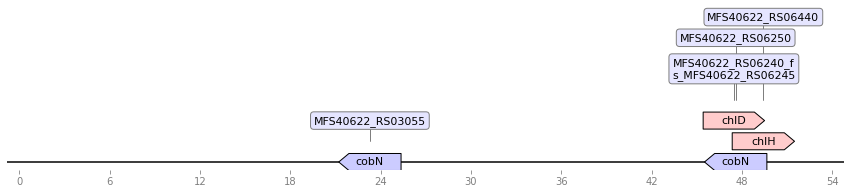

In [17]:
# from chelatase_db.models import ChelataseFeat

# ch_set = ChelataseFeat.objects.filter(seq__org=86, param_set__name='chel_subunit').all()

# all_parents = [i.parent_id for i in ch_set if i.parent_id is not None]

# ch_set_draw = [i for i in ch_set if i.id not in all_parents]

# ch_set_draw[0].prm.chel_gene

# 

# Построение визуализации

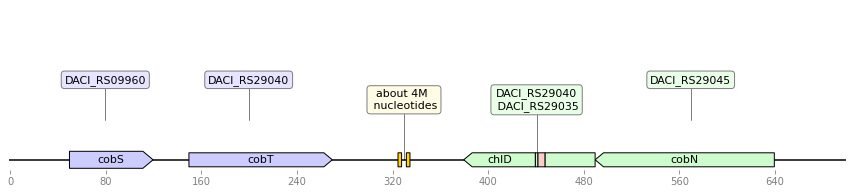

In [223]:

from dna_features_viewer import GraphicFeature, GraphicRecord

features=[
    GraphicFeature(start=80, end=80, strand=0, color= "#ccccff", label="DACI_RS09960"), #Табличка
    GraphicFeature(start=50, end=120, strand=+1, color= "#ccccff",thickness=17, label="cobS"),    
    

    GraphicFeature(start=200, end=200, strand=0, color= "#ccccff", label="DACI_RS29040"), #Табличка
    GraphicFeature(start=150, end=270, strand=+1, color= "#ccccff", label="cobT"),    
    

    GraphicFeature(start=325, end=328, strand=0, color="#ffd700"),
    GraphicFeature(start=330, end=330, strand=0, color="#ffd700", label="about 4M \n nucleotides"),
    GraphicFeature(start=332, end=335, strand=0, color="#ffd700"),


    GraphicFeature(start=440, end=442, strand=0, color="#cffccc", label="DACI_RS29040\n DACI_RS29035"), #Табличка
    GraphicFeature(start=380, thickness=14, end=440, strand=-1, color="#cffccc", label="chlD"),
    GraphicFeature(start=442, end=448, strand=0, color="#ffcccc"),  
    GraphicFeature(start=448, thickness=14, end=490, strand=0, color="#cffccc"),    
    
    
    
    
    GraphicFeature(start=570, end=570, strand=0, color="#cffccc" , label="DACI_RS29045"),    #Табличка
    GraphicFeature(start=490, end=640, strand=-1, color="#cffccc", label="cobN"),  #ffcccc  #Правый ген
    
]
record = GraphicRecord(sequence_length=700, features = features,feature_level_height = 2)

#record.plot_with_bokeh(figure_width=15, figure_height=3)
#record.plot()
record.plot(figure_width=15, figure_height=3);
 

In [5]:
select name, evalue_cobN, evalue_cobT from chel_orgs_v limit 1;

SyntaxError: invalid syntax (<ipython-input-5-cc434716a3f6>, line 1)

In [ ]:
data = #